In [3]:
from numpy import *
import operator

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True
    )
    return sortedClassCount[0][0]

In [4]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())  # get the number of lines in the file
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)  ### New heading
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split("\t")
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector


def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    return normDataSet, ranges, minVals

In [5]:
def datingClassTest():
    hoRatio = 0.50  # hold out 50%
    datingDataMat, datingLabels = file2matrix(
        "/home/jeremyh/jnbook/datingTestSet2.txt"
    )  # load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(

            normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3
        )
        print("the classifier came back with: %d, the real answer is: %d" % (
            classifierResult,
            datingLabels[i],
        ))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)


datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answe

In [6]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')

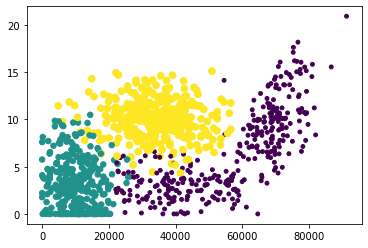

In [7]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

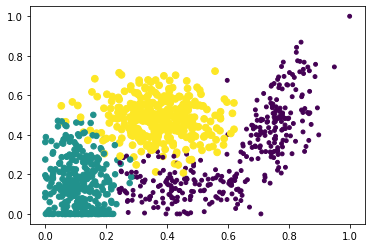

In [8]:
normMat, ranges, minVals = autoNorm(datingDataMat)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
ax1.scatter(normMat[:,0], normMat[:,1],15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

In [9]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [10]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

# Evaluation

## file2matrix
Seems to read the file twice?

## Normalisation
running the ploat on the dating matrix and the normailised matrix gives the same plot.

## Euclidian Distance
d = $\sqrt((xA_0 - xB_0)^2 + (xA_1 - xB_1)^2)$